<h1>MSSV: 22521034</h1>
<h1>Họ tên: Huỳnh Yến Nhi</h1>

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Câu 1: Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện

In [63]:
df = pd.read_csv("heart.csv")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [67]:
df.columns = ['age', 'sex', 'chest_pain_type',
'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
'num_major_vessels', 'thalassemia', 'target']

Câu 2

 Câu 3: Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson.

<Axes: >

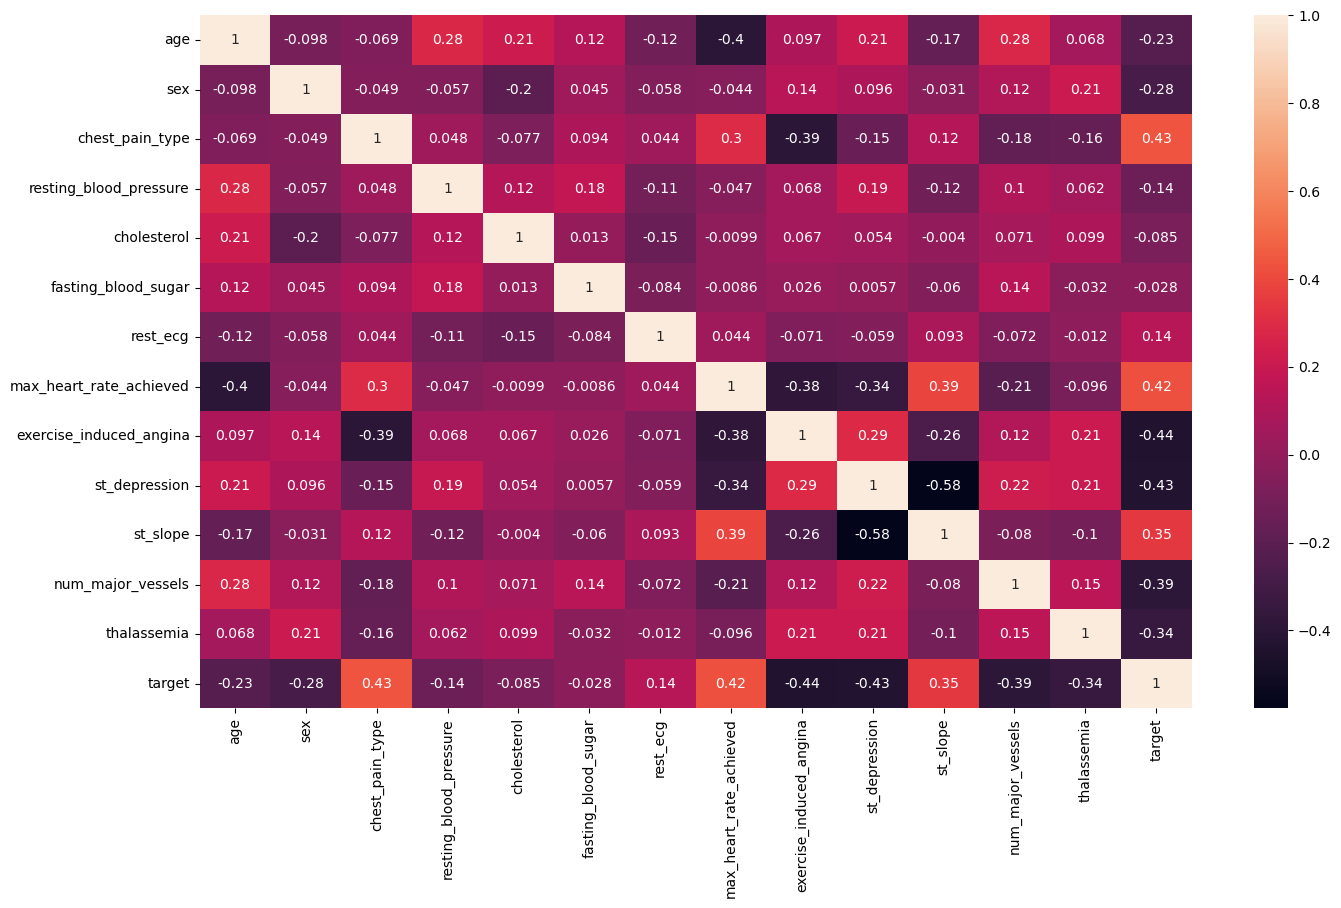

In [69]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết
phải loại bỏ cột nào.

Câu 4: Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.

In [71]:
features = df.drop('target',axis=1)
labels = df['target']

Câu 5: Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

Nhận xét: Vì dữ liệu non-null nên không cần xóa

Câu 6: Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
Tiến hành tách dữ liệu huấn luyện và kiểm thử như thông tin thu được ban đầu.

In [73]:
features.select_dtypes(exclude=['int64']).columns

Index(['st_depression'], dtype='object')

In [75]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,random_state=42)

Câu 7: Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn.

In [77]:
clf= tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
#Predict the response for test dataset
tree_pred = clf.predict(x_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [81]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

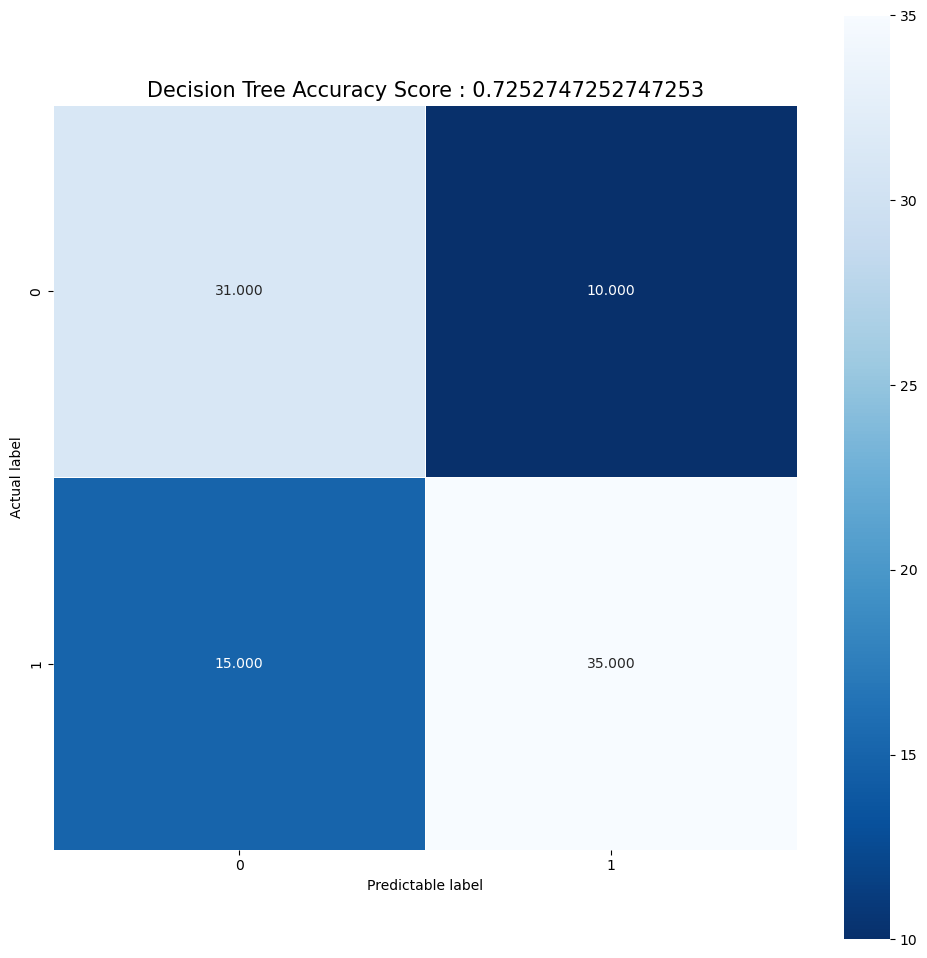

In [83]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

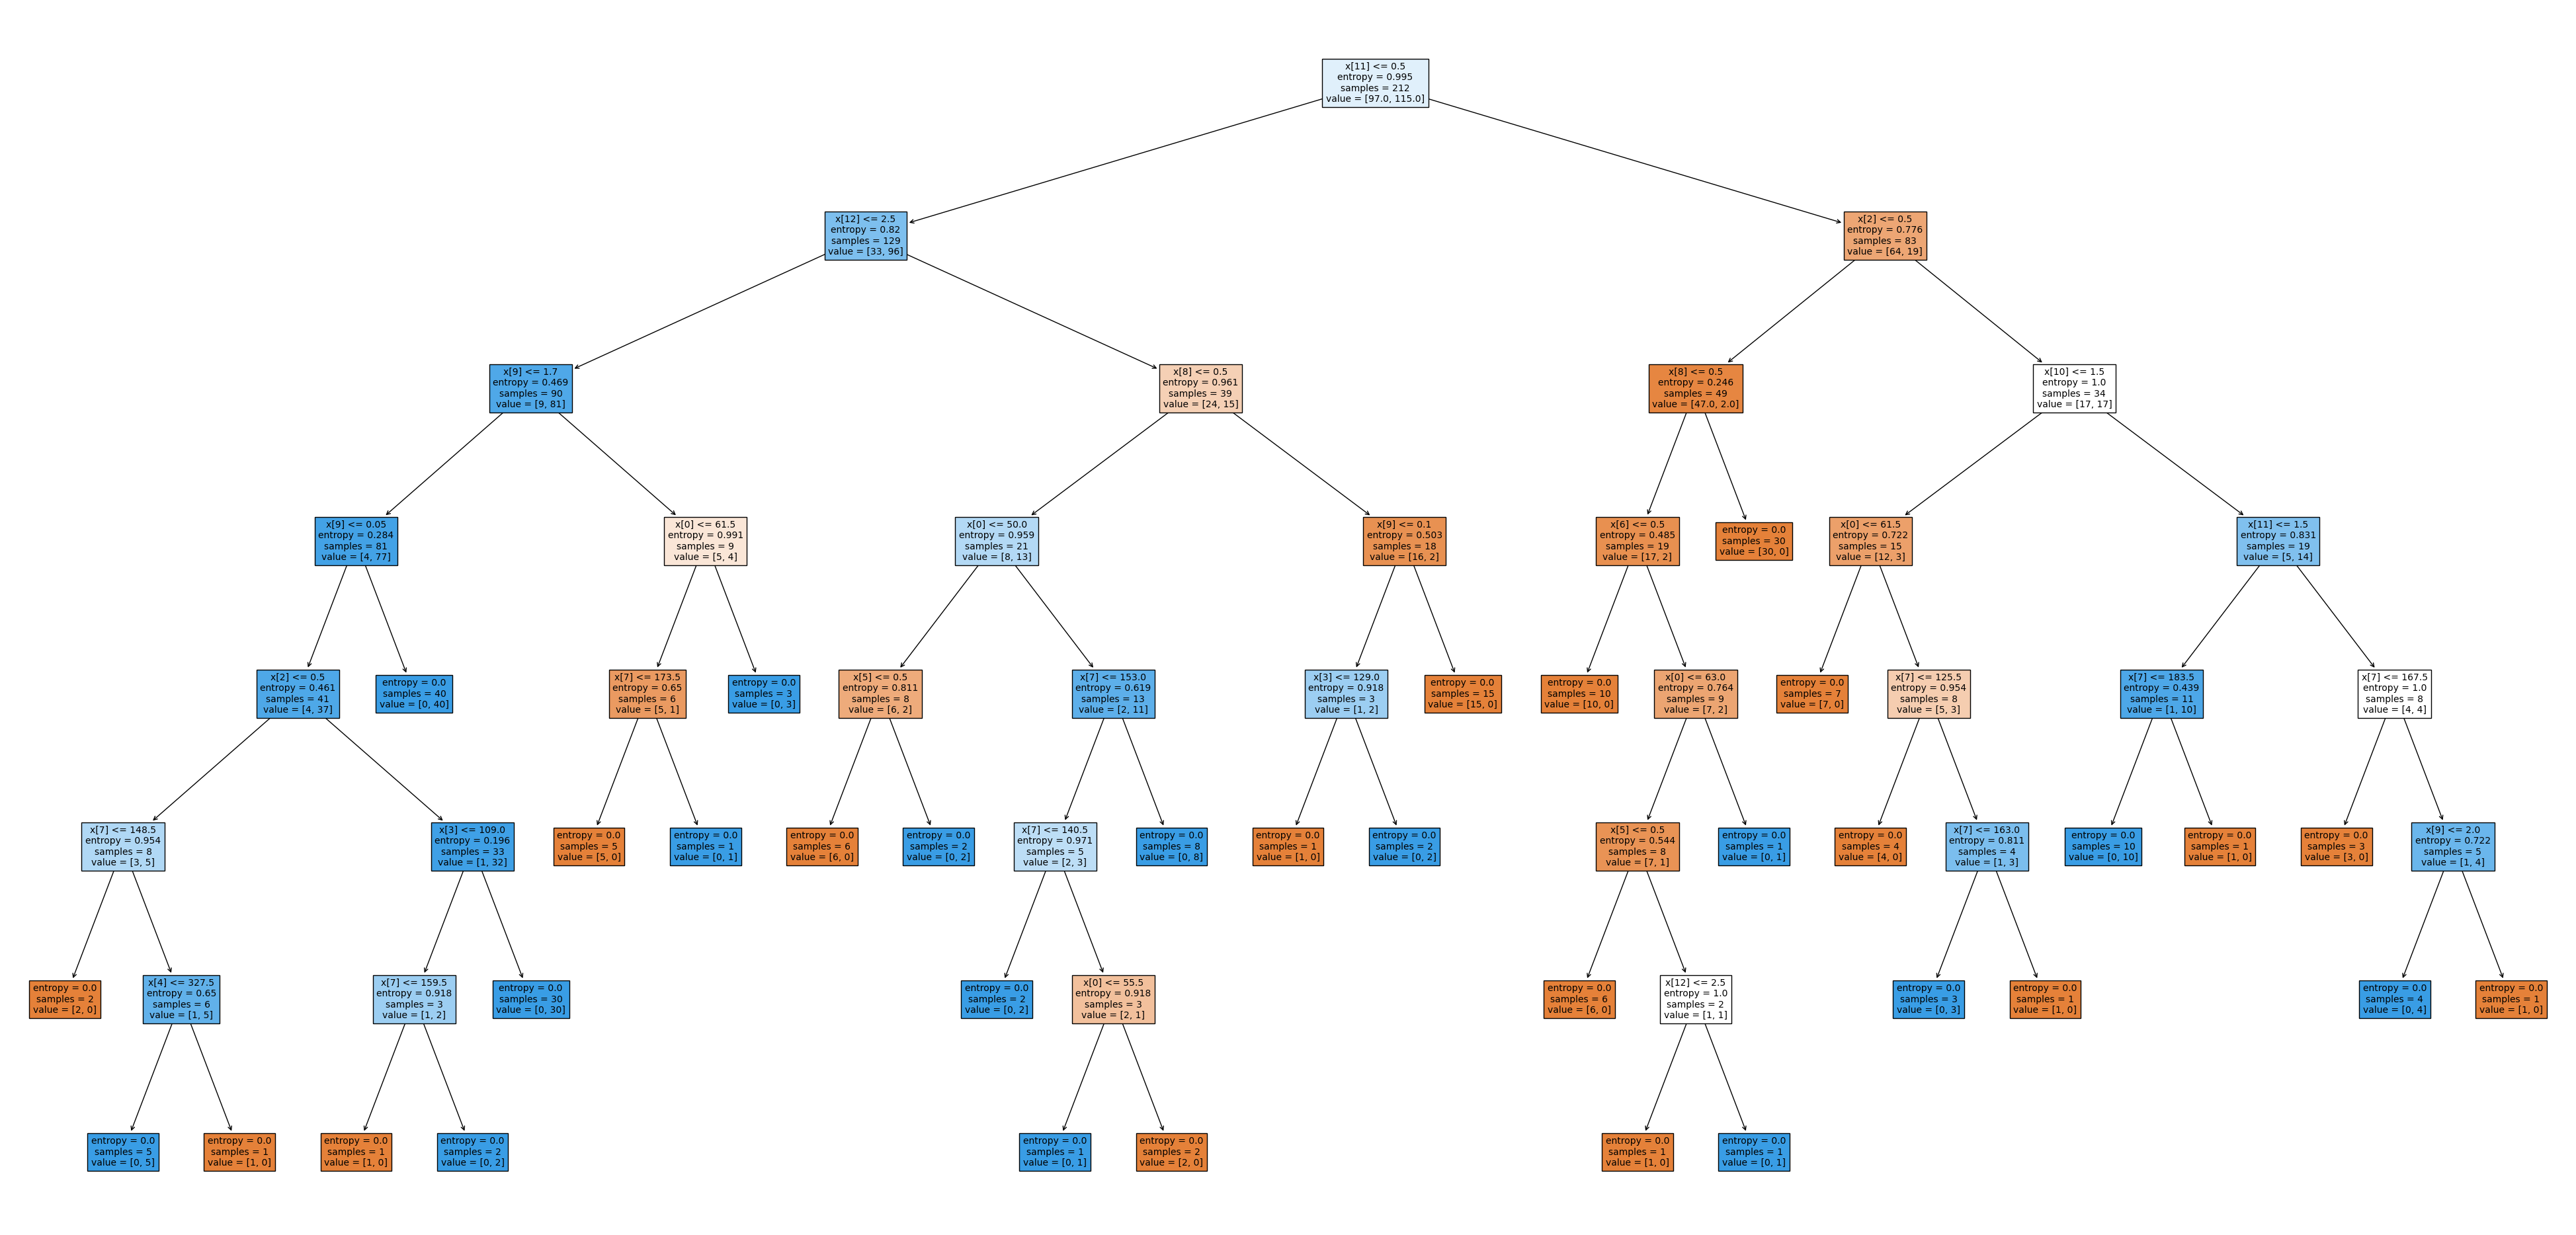

In [85]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

Câu 8

In [87]:
clf= tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifier
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [89]:
#Predict the response for test dataset
tree_pred = clf.predict(x_test)

#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [49]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

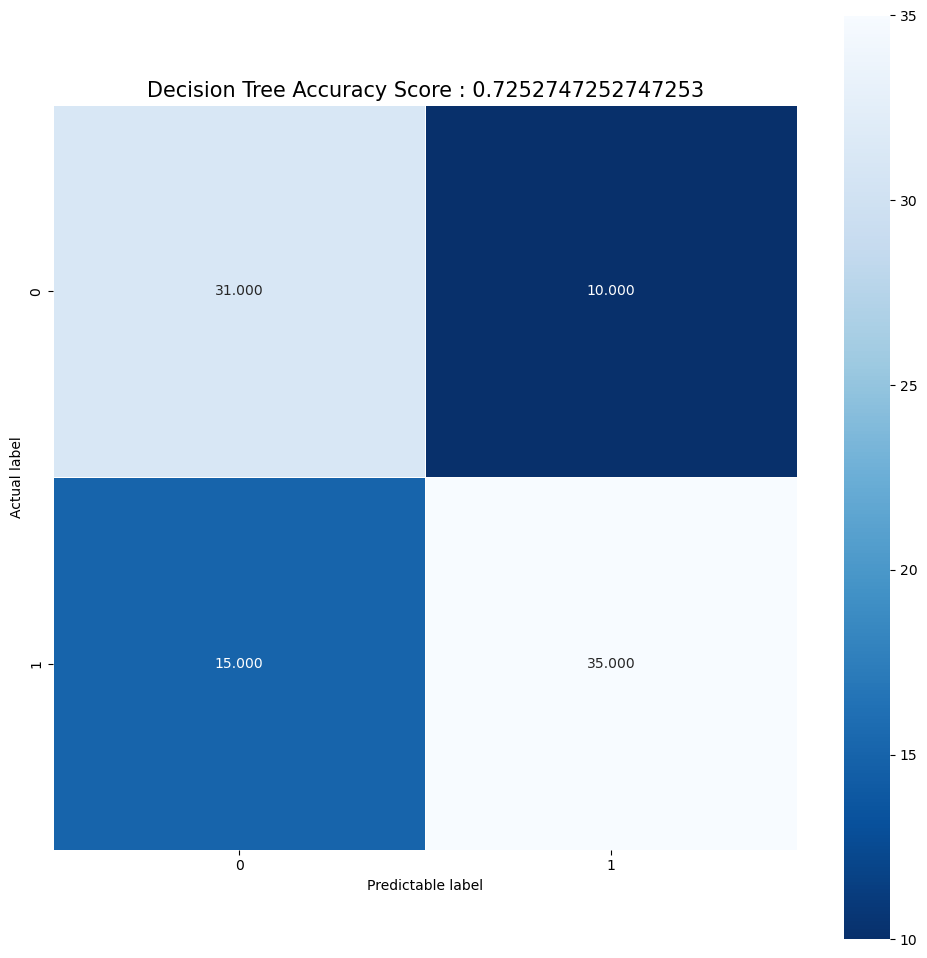

In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predictable label');
title = 'Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size=15);
plt.show()

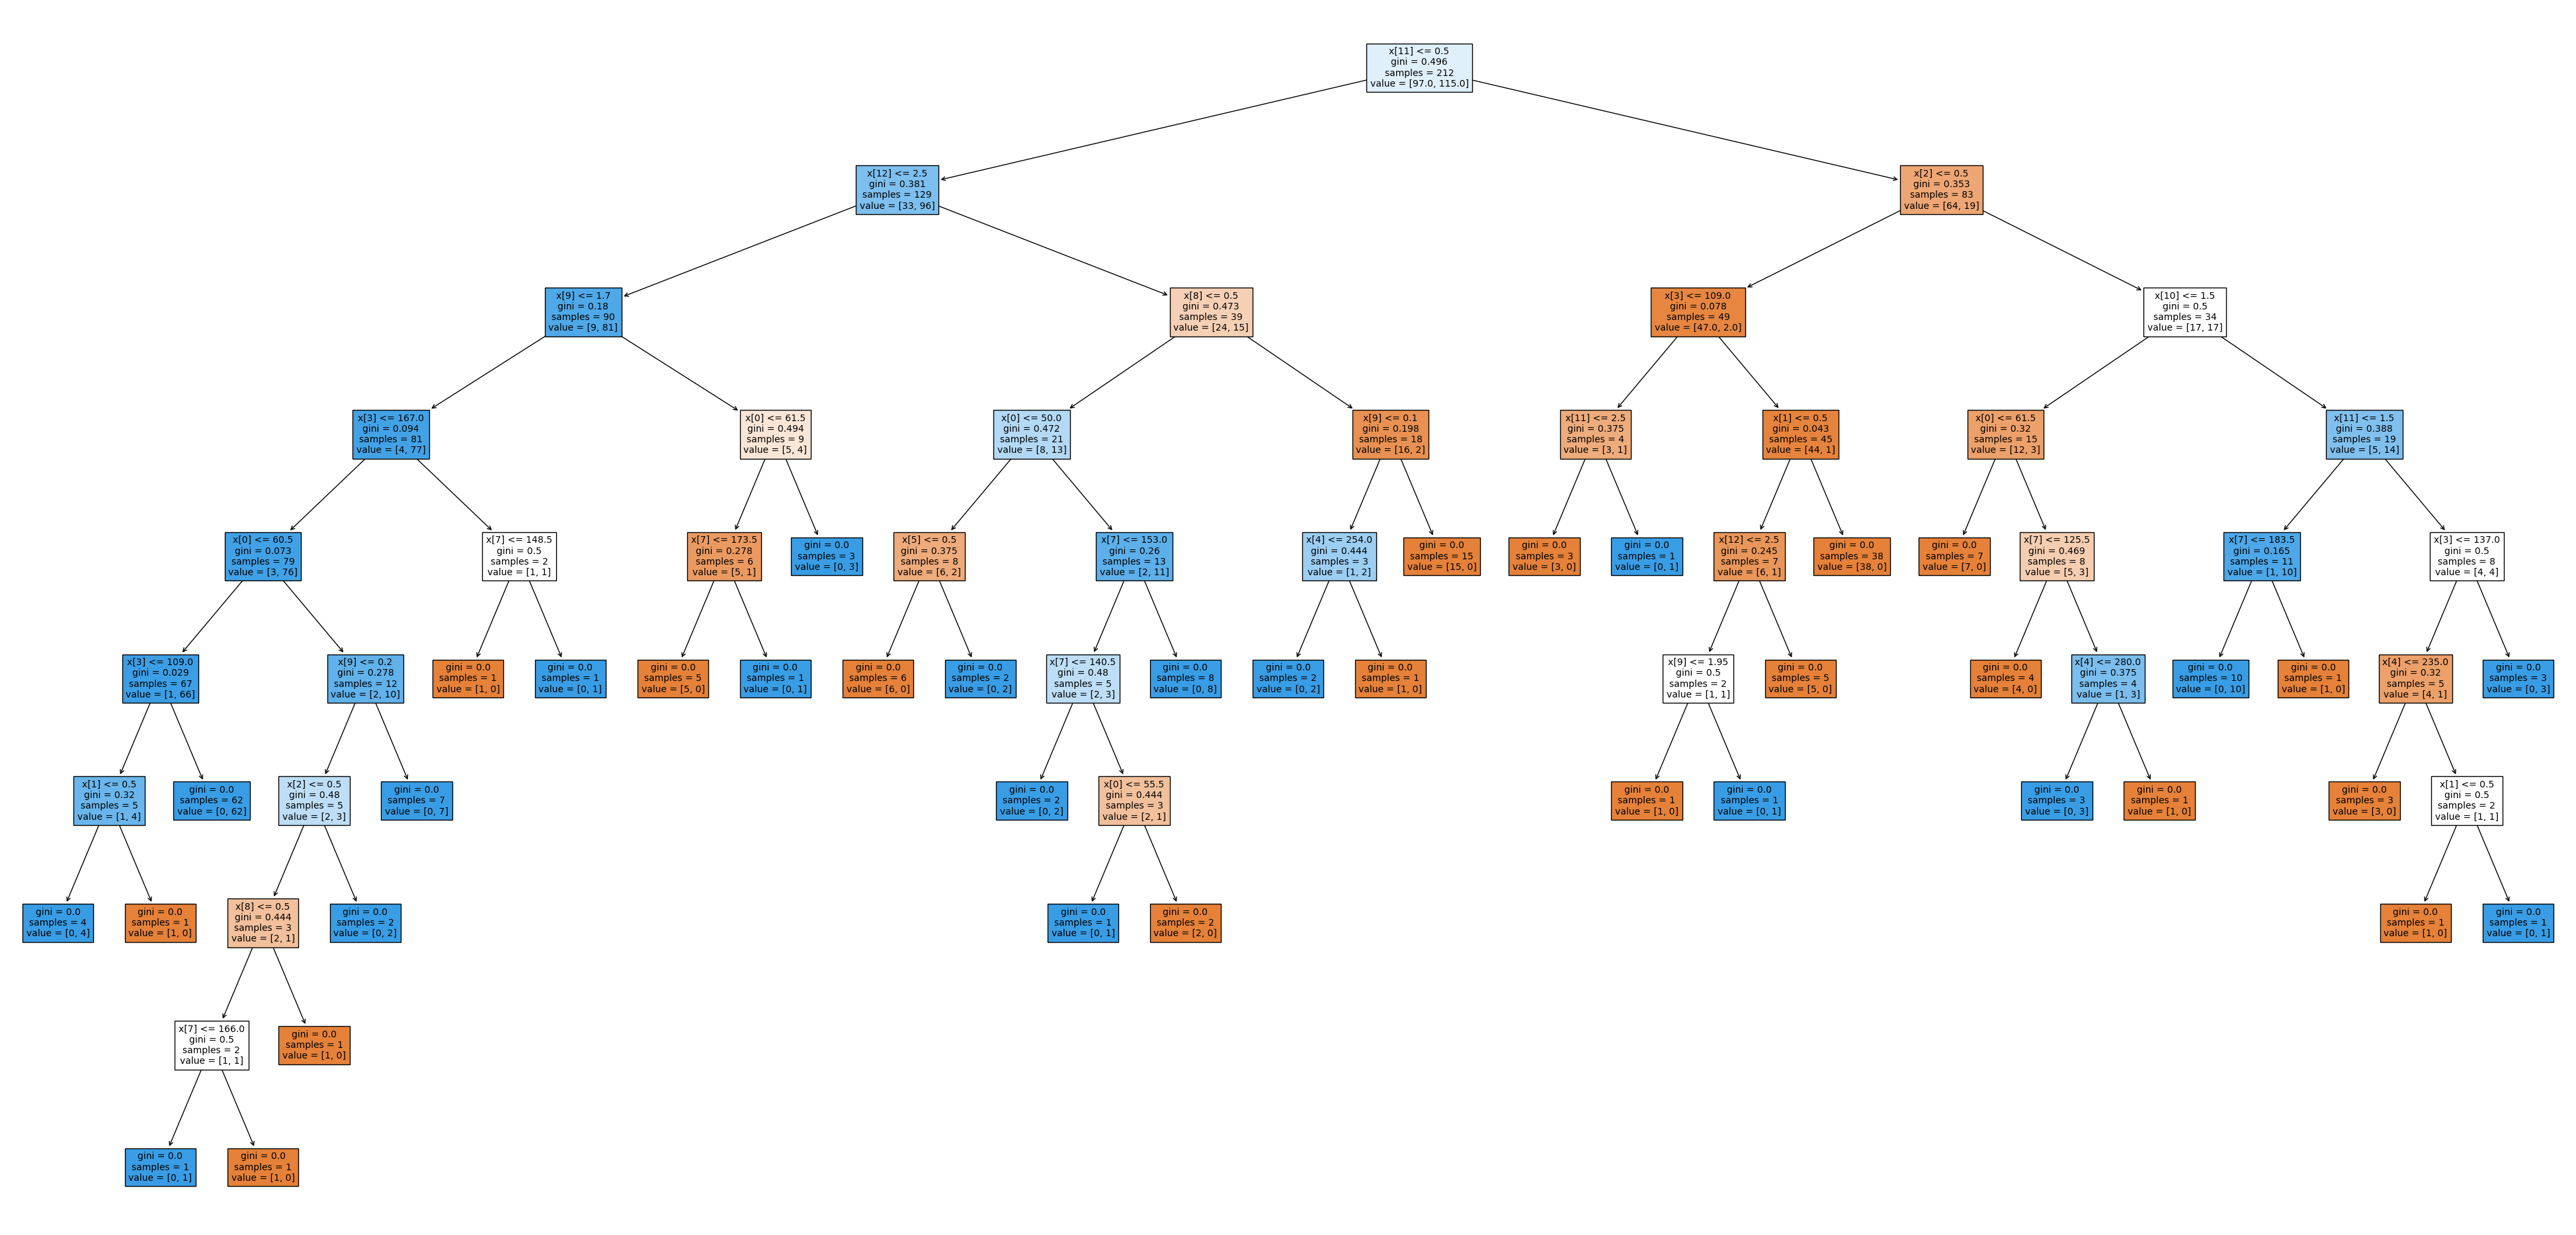

In [97]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_cau5_gini',dpi=100)
plt.show()

Câu 9: Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.

In [99]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train,y_train).predict(x_test)

In [101]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.8351648351648352
Report:               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



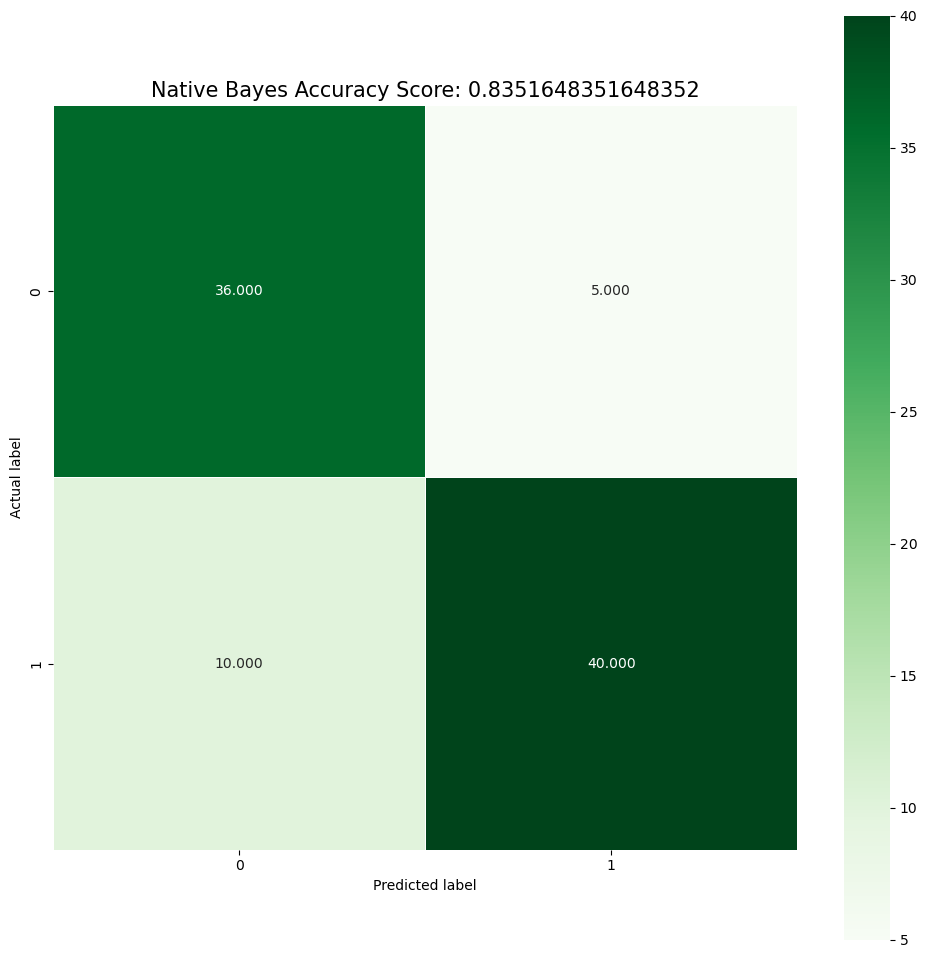

In [103]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Native Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)
plt.show()

Câu 10: So sánh
Dựa vào mô hình ta thấy độ chính xác của các thuật toán như sau:
ID3        :72.527%;
Naive Bayes:83.516%;
CART       :72.527%;
Do đó với việc sử dụng thuật toán Native Bayes cho độ chính xác cao nhất.